# MNISt Classification using PyTorch Lighning

## Colab GitHub Setup

In [ ]:
#!pip install -q pytorch-lightning

In [ ]:
# Mount Google Drive
import sys
from google.colab import drive
drive.mount('/content/gdrive')
# Append project folder path for custom module import to work
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/pt-lightning-mnist')

Mounted at /content/gdrive


In [ ]:
import models
import data
import pandas as pd
import matplotlib.pyplot as plt
import pytorch_lightning as pl

import importlib
importlib.reload(models)

plt.style.use('seaborn')
pl.seed_everything(42)

Global seed set to 42


42

## Train 

In [ ]:
importlib.reload(models)
importlib.reload(data)
model = models.ImageClassifier(channel=1, width=28, height=28, num_classes=10)
dm = data.ImageDataModule()
trainer = pl.Trainer(max_epochs=5, enable_progress_bar=False)
trainer.fit(model, dm)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw




  | Name      | Type              | Params
------------------------------------------------
0 | criterion | CrossEntropyLoss  | 0     
1 | model     | PtImageClassifier | 218 K 
------------------------------------------------
218 K     Trainable params
0         Non-trainable params
218 K     Total params
0.872     Total estimated model params size (MB)


Global seed set to 42


Training Epoch   [   1] ==> train_loss: 0.86450428, train_acc: 81.25% (1499)
Validating Epoch [   1] ==> val_loss  : 0.22275588, val_acc  : 96.88% (374)
Training Epoch   [   2] ==> train_loss: 0.28826699, train_acc: 93.75% (1499)
Validating Epoch [   2] ==> val_loss  : 0.15496109, val_acc  : 93.75% (374)
Training Epoch   [   3] ==> train_loss: 0.62396514, train_acc: 93.75% (1499)
Validating Epoch [   3] ==> val_loss  : 0.06218256, val_acc  : 96.88% (374)
Training Epoch   [   4] ==> train_loss: 0.62412697, train_acc: 93.75% (1499)
Validating Epoch [   4] ==> val_loss  : 0.16641963, val_acc  : 93.75% (374)
Training Epoch   [   5] ==> train_loss: 0.01709045, train_acc: 100.00% (1499)
Validating Epoch [   5] ==> val_loss  : 0.07159436, val_acc  : 96.88% (374)


In [ ]:
# Extract train/val metrics
train_epoch_losses = model.metrics(stage='train', level='epoch')['loss']
val_epoch_losses = model.metrics(stage='val', level='epoch')['loss']
train_epoch_acc = model.metrics(stage='train', level='epoch')['acc']
val_epoch_acc = model.metrics(stage='val', level='epoch')['acc']

In [ ]:
val_epoch_losses

0    0.274249
1    0.239072
2    0.246738
3    0.222847
4    0.223423
5    0.231442
6    0.238857
7    0.232150
8    0.247109
9    0.250615
Name: loss, dtype: float64

In [ ]:
val_epoch_acc[-1:] 

4    0.944583
Name: acc, dtype: float64

In [ ]:
train_epoch_acc[-1:]

4    0.924813
Name: acc, dtype: float64

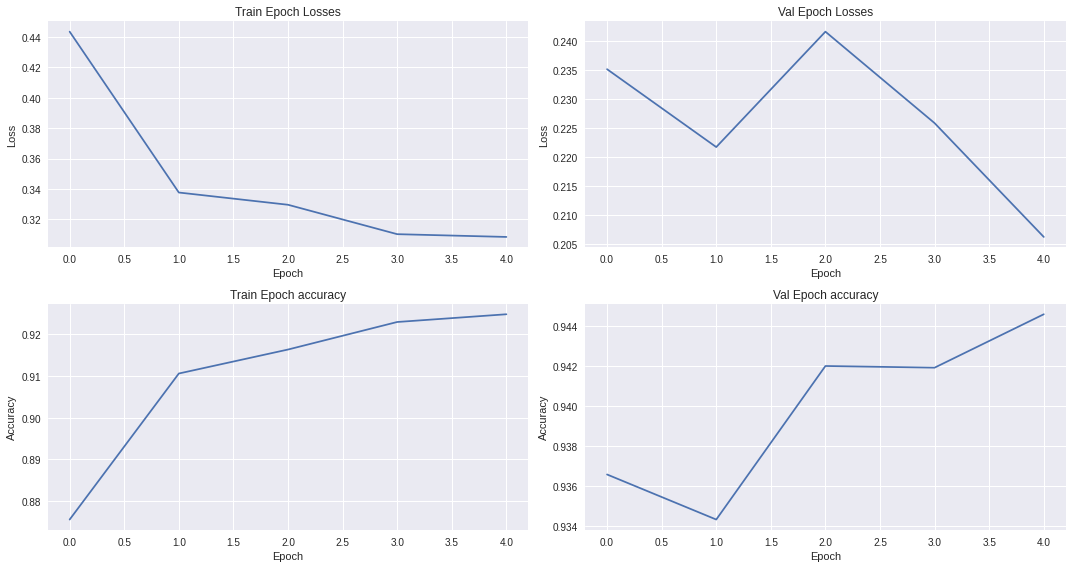

In [ ]:
# Plot metrics
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
train_epoch_losses.plot(kind='line', xlabel='Epoch', ylabel='Loss', title='Train Epoch Losses')
plt.subplot(2, 2, 2)
val_epoch_losses.plot(kind='line', xlabel='Epoch', ylabel='Loss', title='Val Epoch Losses')
plt.subplot(2, 2, 3)
train_epoch_acc.plot(kind='line', xlabel='Epoch', ylabel='Accuracy', title='Train Epoch accuracy')
plt.subplot(2, 2, 4)
val_epoch_acc.plot(kind='line', xlabel='Epoch', ylabel='Accuracy', title='Val Epoch accuracy')
plt.tight_layout()
plt.show()

In [ ]:
# Load the check-pointed pre-trained model
pre_trained_model = models.ImageClassifier.load_from_checkpoint('/content/lightning_logs/version_0/checkpoints/epoch=4-step=7499.ckpt')
pre_trained_model

ImageClassifier(
  (criterion): CrossEntropyLoss()
  (model): PtImageClassifier(
    (layer1): Linear(in_features=784, out_features=256, bias=True)
    (relu1): ReLU()
    (do1): Dropout(p=0.25, inplace=False)
    (layer2): Linear(in_features=256, out_features=64, bias=True)
    (relu2): ReLU()
    (do2): Dropout(p=0.25, inplace=False)
    (layer3): Linear(in_features=64, out_features=10, bias=True)
  )
)

## Evaluate 

In [ ]:
# Load the best pre-trained model (from checkpoint)
pre_trained_model = models.ImageClassifier.load_from_checkpoint('/content/lightning_logs/version_0/checkpoints/epoch=4-step=7499.ckpt')
# Evaluate
trainer.test(pre_trained_model, dm)

Testing ==> test_acc: 93.75% (312)
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'acc': 0.9471153616905212, 'loss': 0.20854535698890686}
--------------------------------------------------------------------------------


[{'acc': 0.9471153616905212, 'loss': 0.20854535698890686}]

## Inference

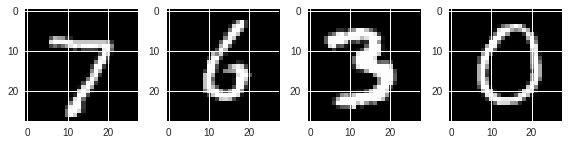


True Labels: (7, 6, 3, 0)


In [ ]:
# Get few images (1x28x28) not part of training/validation for prediction/inference 
# here we'll just pull 4 images from test set
(img1, lbl1), (img2, lbl2), (img3, lbl3), (img4, lbl4) = dm.test_ds[0], dm.test_ds[50], dm.test_ds[500], dm.test_ds[750]
plt.subplot(1, 4, 1);plt.imshow(img1.squeeze(), cmap='gray')
plt.subplot(1, 4, 2);plt.imshow(img2.squeeze(), cmap='gray')
plt.subplot(1, 4, 3);plt.imshow(img3.squeeze(), cmap='gray')
plt.subplot(1, 4, 4);plt.imshow(img4.squeeze(), cmap='gray')
plt.tight_layout()
plt.show()
print(f'\nTrue Labels: {lbl1, lbl2, lbl3, lbl4}')

In [ ]:
# prepare image data batch
import torch
from torch.utils.data import DataLoader, TensorDataset
img_batch = torch.stack([img1, img2, img3, img4])
print(img_batch.shape)
dl = DataLoader(TensorDataset(img_batch), batch_size=32)
len(dl)

torch.Size([4, 1, 28, 28])


1

In [ ]:
# Load the best pre-trained model (from checkpoint)
pre_trained_model = models.ImageClassifier.load_from_checkpoint('/content/lightning_logs/version_0/checkpoints/epoch=4-step=7499.ckpt')
# predict 
predictions = trainer.predict(pre_trained_model, dl)[0]
torch.set_printoptions(sci_mode=False, linewidth=140)
print(f'\nPredicted labels: \n{predictions["preds"]}')
print(f'\nPredicted probabilities: \n{predictions["pred_proba"]}\n')


Predicted labels: 
tensor([7, 6, 3, 0])

Predicted probabilities: 
tensor([[    0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     1.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     1.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0000,     1.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000],
        [    1.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000]])



/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:470: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:470: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  f"DataModule.{name} has already been called, so it will not be called again. "
